In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf
import quandl as ql

In [2]:
df = pd.read_csv('stocks.csv')

df = df[df['Country']== 'United States']

df = list(df[df['Sector'] != np.nan]['Symbol'])

#df = yf.download(df, start = '2020-01-01', end = '2020-12-20')

In [3]:
d = pd.DataFrame(df, columns = ['stock'])

d['strength'] = np.nan

d.index = d['stock']

d.drop('stock', axis = 1, inplace = True)

In [8]:
def aboveMa(ticket,movingAverage, start_date, end_date):
    
    c = yf.download(ticket,threads= False, start = start_date, end = end_date)
    
    counter = 0 
    #temp = c[ticket].rolling(window = movingAverage).mean()[movingAverage:]
    temp = c['Adj Close'].rolling(window = movingAverage).mean()[movingAverage:]
    #for p,m in zip(c[ticket][movingAverage:],temp):
    for p,m in zip(c['Adj Close'][movingAverage:],temp):
        if int(p)>m:
            counter += 1

    return(counter/len(temp))

 
    

In [9]:
counter = 0 

for i in d.index:
    try:
        d['strength'].loc[i] = aboveMa(i,20, '2020-01-01', '2020-12-20')
    except:
        print('no data')
    counter +=1
    print(counter)
    

[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACQW: No data found for this date range, symbol may be delisted
no data
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
no data
9
[*********************100%***********************]  1 of 1 completed
10
[*********************100%***********************]  1 of 1 completed
11
[*********************100%***********************]  1 of 1 completed
12
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
99
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADVWW: No data found for this date range, symbol may be delisted
no data
100
[*********************100%***********************]  1 of 1 completed
101
[*********************100%***********************]  1 of 1 completed
102
[*********************100%***********************]  1 of 1 completed
103
[*********************100%***********************]  1 of 1 completed
104
[*********************100%***********************]  1 of 1 completed
105
[*********************100%***********************]  1 of 1 completed
106
[*********************100%***********************]  1 of 1 completed
107
[*********************100%***********************]  1 of 1 completed
108
[*********************100%***********************]  1 of 1 completed
109
[*********************100%***********************]  1 of 1 completed
110
[*********************100%****

[*********************100%***********************]  1 of 1 completed
203
[*********************100%***********************]  1 of 1 completed
204
[*********************100%***********************]  1 of 1 completed
205
[*********************100%***********************]  1 of 1 completed
206
[*********************100%***********************]  1 of 1 completed
207
[*********************100%***********************]  1 of 1 completed
208
[*********************100%***********************]  1 of 1 completed
209
[*********************100%***********************]  1 of 1 completed
210
[*********************100%***********************]  1 of 1 completed
211
[*********************100%***********************]  1 of 1 completed
212
[*********************100%***********************]  1 of 1 completed
213
[*********************100%***********************]  1 of 1 completed
214
[*********************100%***********************]  1 of 1 completed
215
[*********************100%***********************] 

[*********************100%***********************]  1 of 1 completed
306
[*********************100%***********************]  1 of 1 completed
307
[*********************100%***********************]  1 of 1 completed
308
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AP.WS: No data found, symbol may be delisted
no data
309
[*********************100%***********************]  1 of 1 completed
310
[*********************100%***********************]  1 of 1 completed
311
[*********************100%***********************]  1 of 1 completed
312
[*********************100%***********************]  1 of 1 completed
313
[*********************100%***********************]  1 of 1 completed
314
[*********************100%***********************]  1 of 1 completed
315
[*********************100%***********************]  1 of 1 completed
316
[*********************100%***********************]  1 of 1 completed
317
[*********************100%***********************

[*********************100%***********************]  1 of 1 completed
408
[*********************100%***********************]  1 of 1 completed
409
[*********************100%***********************]  1 of 1 completed
410
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATNFW: No data found for this date range, symbol may be delisted
no data
411
[*********************100%***********************]  1 of 1 completed
412
[*********************100%***********************]  1 of 1 completed
413
[*********************100%***********************]  1 of 1 completed
414
[*********************100%***********************]  1 of 1 completed
415
[*********************100%***********************]  1 of 1 completed
416
[*********************100%***********************]  1 of 1 completed
417
[*********************100%***********************]  1 of 1 completed
418
[*********************100%***********************]  1 of 1 completed
419
[*********************100%***

[*********************100%***********************]  1 of 1 completed
514
[*********************100%***********************]  1 of 1 completed
515
[*********************100%***********************]  1 of 1 completed
516
[*********************100%***********************]  1 of 1 completed
517
[*********************100%***********************]  1 of 1 completed
518
[*********************100%***********************]  1 of 1 completed
519
[*********************100%***********************]  1 of 1 completed
520
[*********************100%***********************]  1 of 1 completed
521
[*********************100%***********************]  1 of 1 completed
no data
522
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BCAC: No data found, symbol may be delisted
no data
523
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BCACU: No data found for this date range, symbol may be delisted
no data
524
[*******************

[*********************100%***********************]  1 of 1 completed
613
no data
614
[*********************100%***********************]  1 of 1 completed
615
[*********************100%***********************]  1 of 1 completed
616
[*********************100%***********************]  1 of 1 completed
617
[*********************100%***********************]  1 of 1 completed
618
[*********************100%***********************]  1 of 1 completed
619
[*********************100%***********************]  1 of 1 completed
620
[*********************100%***********************]  1 of 1 completed
621
[*********************100%***********************]  1 of 1 completed
622
[*********************100%***********************]  1 of 1 completed
623
[*********************100%***********************]  1 of 1 completed
624
[*********************100%***********************]  1 of 1 completed
625
[*********************100%***********************]  1 of 1 completed
626
[*********************100%*************

[*********************100%***********************]  1 of 1 completed
719
[*********************100%***********************]  1 of 1 completed
720
[*********************100%***********************]  1 of 1 completed
721
[*********************100%***********************]  1 of 1 completed
722
[*********************100%***********************]  1 of 1 completed
723
[*********************100%***********************]  1 of 1 completed
724
[*********************100%***********************]  1 of 1 completed
725
[*********************100%***********************]  1 of 1 completed
726
[*********************100%***********************]  1 of 1 completed
727
[*********************100%***********************]  1 of 1 completed
728
[*********************100%***********************]  1 of 1 completed
729
[*********************100%***********************]  1 of 1 completed
730
[*********************100%***********************]  1 of 1 completed
731
[*********************100%***********************] 

[*********************100%***********************]  1 of 1 completed
830
[*********************100%***********************]  1 of 1 completed
831
[*********************100%***********************]  1 of 1 completed
832
[*********************100%***********************]  1 of 1 completed
833
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CCIV.U: No data found, symbol may be delisted
no data
834
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CCIV.WS: No data found, symbol may be delisted
no data
835
[*********************100%***********************]  1 of 1 completed
836
[*********************100%***********************]  1 of 1 completed
837
[*********************100%***********************]  1 of 1 completed
838
[*********************100%***********************]  1 of 1 completed
839
[*********************100%***********************]  1 of 1 completed
840
[*********************100%******************

[*********************100%***********************]  1 of 1 completed
930
[*********************100%***********************]  1 of 1 completed
931
[*********************100%***********************]  1 of 1 completed
932
[*********************100%***********************]  1 of 1 completed
933
[*********************100%***********************]  1 of 1 completed
934
[*********************100%***********************]  1 of 1 completed
935
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CHPMW: No data found for this date range, symbol may be delisted
no data
936
[*********************100%***********************]  1 of 1 completed
937
[*********************100%***********************]  1 of 1 completed
938
[*********************100%***********************]  1 of 1 completed
939
[*********************100%***********************]  1 of 1 completed
940
[*********************100%***********************]  1 of 1 completed
941
[*********************100%***

[*********************100%***********************]  1 of 1 completed
1032
[*********************100%***********************]  1 of 1 completed
1033
[*********************100%***********************]  1 of 1 completed
1034
[*********************100%***********************]  1 of 1 completed
1035
[*********************100%***********************]  1 of 1 completed
1036
[*********************100%***********************]  1 of 1 completed
1037
[*********************100%***********************]  1 of 1 completed
1038
[*********************100%***********************]  1 of 1 completed
1039
[*********************100%***********************]  1 of 1 completed
1040
[*********************100%***********************]  1 of 1 completed
1041
[*********************100%***********************]  1 of 1 completed
1042
[*********************100%***********************]  1 of 1 completed
1043
[*********************100%***********************]  1 of 1 completed
1044
[*********************100%************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CRSAW: No data found for this date range, symbol may be delisted
no data
1138
[*********************100%***********************]  1 of 1 completed
1139
[*********************100%***********************]  1 of 1 completed
1140
[*********************100%***********************]  1 of 1 completed
1141
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CRTDW: No data found for this date range, symbol may be delisted
no data
1142
[*********************100%***********************]  1 of 1 completed
1143
[*********************100%***********************]  1 of 1 completed
1144
[*********************100%***********************]  1 of 1 completed
1145
[*********************100%***********************]  1 of 1 completed
1146
[*********************100%***********************]  1 of 1 completed
1147
[*********************100%***********************]  1 of 1 completed
1

[*********************100%***********************]  1 of 1 completed
1241
[*********************100%***********************]  1 of 1 completed
1242
[*********************100%***********************]  1 of 1 completed
1243
[*********************100%***********************]  1 of 1 completed
1244
[*********************100%***********************]  1 of 1 completed
1245
[*********************100%***********************]  1 of 1 completed
1246
[*********************100%***********************]  1 of 1 completed
1247
[*********************100%***********************]  1 of 1 completed
1248
[*********************100%***********************]  1 of 1 completed
1249
[*********************100%***********************]  1 of 1 completed
1250
[*********************100%***********************]  1 of 1 completed
1251
[*********************100%***********************]  1 of 1 completed
1252
[*********************100%***********************]  1 of 1 completed
1253
[*********************100%************

[*********************100%***********************]  1 of 1 completed
1338
[*********************100%***********************]  1 of 1 completed
1339
[*********************100%***********************]  1 of 1 completed
1340
[*********************100%***********************]  1 of 1 completed
1341
[*********************100%***********************]  1 of 1 completed
1342
[*********************100%***********************]  1 of 1 completed
1343
[*********************100%***********************]  1 of 1 completed
1344
[*********************100%***********************]  1 of 1 completed
1345
[*********************100%***********************]  1 of 1 completed
1346
[*********************100%***********************]  1 of 1 completed
1347
[*********************100%***********************]  1 of 1 completed
1348
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DLPNW: No data found for this date range, symbol may be delisted
no data
1349
[****************

[*********************100%***********************]  1 of 1 completed
1440
[*********************100%***********************]  1 of 1 completed
1441
[*********************100%***********************]  1 of 1 completed
1442
[*********************100%***********************]  1 of 1 completed
1443
[*********************100%***********************]  1 of 1 completed
1444
[*********************100%***********************]  1 of 1 completed
1445
[*********************100%***********************]  1 of 1 completed
1446
[*********************100%***********************]  1 of 1 completed
1447
[*********************100%***********************]  1 of 1 completed
1448
[*********************100%***********************]  1 of 1 completed
1449
[*********************100%***********************]  1 of 1 completed
1450
[*********************100%***********************]  1 of 1 completed
1451
[*********************100%***********************]  1 of 1 completed
1452
[*********************100%************

[*********************100%***********************]  1 of 1 completed
1546
[*********************100%***********************]  1 of 1 completed
1547
[*********************100%***********************]  1 of 1 completed
1548
[*********************100%***********************]  1 of 1 completed
1549
[*********************100%***********************]  1 of 1 completed
1550
[*********************100%***********************]  1 of 1 completed
1551
[*********************100%***********************]  1 of 1 completed
1552
[*********************100%***********************]  1 of 1 completed
1553
[*********************100%***********************]  1 of 1 completed
1554
[*********************100%***********************]  1 of 1 completed
1555
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- EQD.U: No data found, symbol may be delisted
no data
1556
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- EQD.WS: No data foun

[*********************100%***********************]  1 of 1 completed
1648
[*********************100%***********************]  1 of 1 completed
1649
[*********************100%***********************]  1 of 1 completed
1650
[*********************100%***********************]  1 of 1 completed
1651
[*********************100%***********************]  1 of 1 completed
1652
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- EYESW: No data found for this date range, symbol may be delisted
no data
1653
[*********************100%***********************]  1 of 1 completed
1654
[*********************100%***********************]  1 of 1 completed
1655
[*********************100%***********************]  1 of 1 completed
1656
[*********************100%***********************]  1 of 1 completed
1657
[*********************100%***********************]  1 of 1 completed
1658
[*********************100%***********************]  1 of 1 completed
1659
[****************

[*********************100%***********************]  1 of 1 completed
1750
[*********************100%***********************]  1 of 1 completed
1751
[*********************100%***********************]  1 of 1 completed
1752
[*********************100%***********************]  1 of 1 completed
1753
[*********************100%***********************]  1 of 1 completed
1754
[*********************100%***********************]  1 of 1 completed
1755
[*********************100%***********************]  1 of 1 completed
1756
[*********************100%***********************]  1 of 1 completed
1757
[*********************100%***********************]  1 of 1 completed
1758
[*********************100%***********************]  1 of 1 completed
1759
[*********************100%***********************]  1 of 1 completed
1760
[*********************100%***********************]  1 of 1 completed
1761
[*********************100%***********************]  1 of 1 completed
1762
[*********************100%************

[*********************100%***********************]  1 of 1 completed
1853
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FSRVW: No data found for this date range, symbol may be delisted
no data
1854
[*********************100%***********************]  1 of 1 completed
1855
[*********************100%***********************]  1 of 1 completed
1856
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FST.U: No data found, symbol may be delisted
no data
1857
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FST.WS: No data found, symbol may be delisted
no data
1858
[*********************100%***********************]  1 of 1 completed
1859
[*********************100%***********************]  1 of 1 completed
1860
[*********************100%***********************]  1 of 1 completed
1861
[*********************100%***********************]  1 of 1 completed
1862
[*************

[*********************100%***********************]  1 of 1 completed
1949
[*********************100%***********************]  1 of 1 completed
1950
[*********************100%***********************]  1 of 1 completed
1951
[*********************100%***********************]  1 of 1 completed
1952
[*********************100%***********************]  1 of 1 completed
no data
1953
[*********************100%***********************]  1 of 1 completed
1954
[*********************100%***********************]  1 of 1 completed
1955
[*********************100%***********************]  1 of 1 completed
1956
[*********************100%***********************]  1 of 1 completed
1957
[*********************100%***********************]  1 of 1 completed
1958
[*********************100%***********************]  1 of 1 completed
1959
[*********************100%***********************]  1 of 1 completed
1960
[*********************100%***********************]  1 of 1 completed
1961
[*********************100%****

[*********************100%***********************]  1 of 1 completed
2053
[*********************100%***********************]  1 of 1 completed
2054
[*********************100%***********************]  1 of 1 completed
2055
[*********************100%***********************]  1 of 1 completed
2056
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GRNVR: No data found for this date range, symbol may be delisted
no data
2057
[*********************100%***********************]  1 of 1 completed
2058
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GRNVW: No data found for this date range, symbol may be delisted
no data
2059
[*********************100%***********************]  1 of 1 completed
2060
[*********************100%***********************]  1 of 1 completed
2061
[*********************100%***********************]  1 of 1 completed
2062
[*********************100%***********************]  1 of 1 completed
2

[*********************100%***********************]  1 of 1 completed
2151
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- HECCW: No data found for this date range, symbol may be delisted
no data
2152
[*********************100%***********************]  1 of 1 completed
2153
[*********************100%***********************]  1 of 1 completed
2154
no data
2155
[*********************100%***********************]  1 of 1 completed
2156
[*********************100%***********************]  1 of 1 completed
2157
[*********************100%***********************]  1 of 1 completed
2158
[*********************100%***********************]  1 of 1 completed
2159
[*********************100%***********************]  1 of 1 completed
2160
[*********************100%***********************]  1 of 1 completed
2161
[*********************100%***********************]  1 of 1 completed
2162
[*********************100%***********************]  1 of 1 completed
no data
2

[*********************100%***********************]  1 of 1 completed
2254
[*********************100%***********************]  1 of 1 completed
2255
[*********************100%***********************]  1 of 1 completed
2256
[*********************100%***********************]  1 of 1 completed
2257
[*********************100%***********************]  1 of 1 completed
2258
[*********************100%***********************]  1 of 1 completed
2259
[*********************100%***********************]  1 of 1 completed
2260
[*********************100%***********************]  1 of 1 completed
2261
[*********************100%***********************]  1 of 1 completed
2262
[*********************100%***********************]  1 of 1 completed
2263
[*********************100%***********************]  1 of 1 completed
2264
[*********************100%***********************]  1 of 1 completed
2265
[*********************100%***********************]  1 of 1 completed
2266
[*********************100%************

[*********************100%***********************]  1 of 1 completed
2356
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IGACW: No data found for this date range, symbol may be delisted
no data
2357
[*********************100%***********************]  1 of 1 completed
2358
[*********************100%***********************]  1 of 1 completed
2359
[*********************100%***********************]  1 of 1 completed
2360
[*********************100%***********************]  1 of 1 completed
2361
[*********************100%***********************]  1 of 1 completed
2362
[*********************100%***********************]  1 of 1 completed
2363
[*********************100%***********************]  1 of 1 completed
2364
[*********************100%***********************]  1 of 1 completed
2365
[*********************100%***********************]  1 of 1 completed
2366
[*********************100%***********************]  1 of 1 completed
2367
[****************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- IPOF.WS: No data found, symbol may be delisted
no data
2456
[*********************100%***********************]  1 of 1 completed
2457
[*********************100%***********************]  1 of 1 completed
2458
[*********************100%***********************]  1 of 1 completed
2459
[*********************100%***********************]  1 of 1 completed
2460
[*********************100%***********************]  1 of 1 completed
2461
[*********************100%***********************]  1 of 1 completed
2462
[*********************100%***********************]  1 of 1 completed
2463
[*********************100%***********************]  1 of 1 completed
2464
[*********************100%***********************]  1 of 1 completed
2465
[*********************100%***********************]  1 of 1 completed
2466
[*********************100%***********************]  1 of 1 completed
2467
[*********************100%*********

[*********************100%***********************]  1 of 1 completed
2553
[*********************100%***********************]  1 of 1 completed
2554
[*********************100%***********************]  1 of 1 completed
2555
[*********************100%***********************]  1 of 1 completed
2556
[*********************100%***********************]  1 of 1 completed
2557
[*********************100%***********************]  1 of 1 completed
2558
[*********************100%***********************]  1 of 1 completed
2559
[*********************100%***********************]  1 of 1 completed
2560
[*********************100%***********************]  1 of 1 completed
2561
[*********************100%***********************]  1 of 1 completed
2562
[*********************100%***********************]  1 of 1 completed
2563
[*********************100%***********************]  1 of 1 completed
2564
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JUPWW: No data found 

[*********************100%***********************]  1 of 1 completed
2660
[*********************100%***********************]  1 of 1 completed
2661
[*********************100%***********************]  1 of 1 completed
2662
[*********************100%***********************]  1 of 1 completed
2663
[*********************100%***********************]  1 of 1 completed
2664
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- LACQW: No data found for this date range, symbol may be delisted
no data
2665
[*********************100%***********************]  1 of 1 completed
2666
[*********************100%***********************]  1 of 1 completed
2667
[*********************100%***********************]  1 of 1 completed
2668
[*********************100%***********************]  1 of 1 completed
2669
[*********************100%***********************]  1 of 1 completed
2670
[*********************100%***********************]  1 of 1 completed
2671
[****************

[*********************100%***********************]  1 of 1 completed
2752
[*********************100%***********************]  1 of 1 completed
2753
[*********************100%***********************]  1 of 1 completed
2754
[*********************100%***********************]  1 of 1 completed
2755
[*********************100%***********************]  1 of 1 completed
no data
2756
[*********************100%***********************]  1 of 1 completed
2757
[*********************100%***********************]  1 of 1 completed
2758
[*********************100%***********************]  1 of 1 completed
2759
[*********************100%***********************]  1 of 1 completed
2760
[*********************100%***********************]  1 of 1 completed
2761
[*********************100%***********************]  1 of 1 completed
2762
[*********************100%***********************]  1 of 1 completed
2763
[*********************100%***********************]  1 of 1 completed
2764
[*********************100%****

[*********************100%***********************]  1 of 1 completed
2856
[*********************100%***********************]  1 of 1 completed
2857
[*********************100%***********************]  1 of 1 completed
2858
[*********************100%***********************]  1 of 1 completed
2859
[*********************100%***********************]  1 of 1 completed
2860
[*********************100%***********************]  1 of 1 completed
2861
[*********************100%***********************]  1 of 1 completed
2862
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- MARKP: No data found, symbol may be delisted
no data
2863
[*********************100%***********************]  1 of 1 completed
2864
[*********************100%***********************]  1 of 1 completed
2865
[*********************100%***********************]  1 of 1 completed
2866
[*********************100%***********************]  1 of 1 completed
no data
2867
[*********************100%***

[*********************100%***********************]  1 of 1 completed
2961
[*********************100%***********************]  1 of 1 completed
2962
[*********************100%***********************]  1 of 1 completed
2963
[*********************100%***********************]  1 of 1 completed
2964
[*********************100%***********************]  1 of 1 completed
2965
[*********************100%***********************]  1 of 1 completed
2966
[*********************100%***********************]  1 of 1 completed
2967
[*********************100%***********************]  1 of 1 completed
2968
[*********************100%***********************]  1 of 1 completed
2969
[*********************100%***********************]  1 of 1 completed
2970
[*********************100%***********************]  1 of 1 completed
2971
[*********************100%***********************]  1 of 1 completed
2972
[*********************100%***********************]  1 of 1 completed
2973
[*********************100%************

[*********************100%***********************]  1 of 1 completed
3065
[*********************100%***********************]  1 of 1 completed
3066
[*********************100%***********************]  1 of 1 completed
3067
[*********************100%***********************]  1 of 1 completed
no data
3068
[*********************100%***********************]  1 of 1 completed
3069
[*********************100%***********************]  1 of 1 completed
3070
[*********************100%***********************]  1 of 1 completed
3071
[*********************100%***********************]  1 of 1 completed
3072
[*********************100%***********************]  1 of 1 completed
3073
[*********************100%***********************]  1 of 1 completed
3074
[*********************100%***********************]  1 of 1 completed
3075
[*********************100%***********************]  1 of 1 completed
3076
[*********************100%***********************]  1 of 1 completed
3077
[*********************100%****

[*********************100%***********************]  1 of 1 completed
3174
[*********************100%***********************]  1 of 1 completed
3175
[*********************100%***********************]  1 of 1 completed
3176
[*********************100%***********************]  1 of 1 completed
3177
[*********************100%***********************]  1 of 1 completed
3178
[*********************100%***********************]  1 of 1 completed
3179
[*********************100%***********************]  1 of 1 completed
3180
[*********************100%***********************]  1 of 1 completed
3181
[*********************100%***********************]  1 of 1 completed
3182
[*********************100%***********************]  1 of 1 completed
3183
[*********************100%***********************]  1 of 1 completed
3184
[*********************100%***********************]  1 of 1 completed
3185
[*********************100%***********************]  1 of 1 completed
3186
[*********************100%************

[*********************100%***********************]  1 of 1 completed
3274
[*********************100%***********************]  1 of 1 completed
3275
[*********************100%***********************]  1 of 1 completed
3276
[*********************100%***********************]  1 of 1 completed
3277
[*********************100%***********************]  1 of 1 completed
3278
[*********************100%***********************]  1 of 1 completed
3279
[*********************100%***********************]  1 of 1 completed
3280
[*********************100%***********************]  1 of 1 completed
3281
[*********************100%***********************]  1 of 1 completed
3282
[*********************100%***********************]  1 of 1 completed
3283
[*********************100%***********************]  1 of 1 completed
3284
[*********************100%***********************]  1 of 1 completed
3285
[*********************100%***********************]  1 of 1 completed
3286
[*********************100%************

[*********************100%***********************]  1 of 1 completed
3380
[*********************100%***********************]  1 of 1 completed
3381
[*********************100%***********************]  1 of 1 completed
3382
[*********************100%***********************]  1 of 1 completed
3383
[*********************100%***********************]  1 of 1 completed
3384
[*********************100%***********************]  1 of 1 completed
3385
[*********************100%***********************]  1 of 1 completed
3386
[*********************100%***********************]  1 of 1 completed
3387
[*********************100%***********************]  1 of 1 completed
3388
[*********************100%***********************]  1 of 1 completed
3389
[*********************100%***********************]  1 of 1 completed
3390
[*********************100%***********************]  1 of 1 completed
3391
[*********************100%***********************]  1 of 1 completed
3392
[*********************100%************

[*********************100%***********************]  1 of 1 completed
3485
[*********************100%***********************]  1 of 1 completed
3486
[*********************100%***********************]  1 of 1 completed
3487
[*********************100%***********************]  1 of 1 completed
3488
[*********************100%***********************]  1 of 1 completed
3489
[*********************100%***********************]  1 of 1 completed
3490
[*********************100%***********************]  1 of 1 completed
3491
[*********************100%***********************]  1 of 1 completed
3492
[*********************100%***********************]  1 of 1 completed
3493
[*********************100%***********************]  1 of 1 completed
3494
[*********************100%***********************]  1 of 1 completed
3495
[*********************100%***********************]  1 of 1 completed
3496
[*********************100%***********************]  1 of 1 completed
3497
[*********************100%************

[*********************100%***********************]  1 of 1 completed
3581
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PCAR21: No data found, symbol may be delisted
no data
3582
[*********************100%***********************]  1 of 1 completed
3583
[*********************100%***********************]  1 of 1 completed
3584
[*********************100%***********************]  1 of 1 completed
3585
[*********************100%***********************]  1 of 1 completed
3586
[*********************100%***********************]  1 of 1 completed
3587
[*********************100%***********************]  1 of 1 completed
3588
[*********************100%***********************]  1 of 1 completed
3589
[*********************100%***********************]  1 of 1 completed
3590
[*********************100%***********************]  1 of 1 completed
3591
[*********************100%***********************]  1 of 1 completed
3592
[*********************100%**********

[*********************100%***********************]  1 of 1 completed
3686
[*********************100%***********************]  1 of 1 completed
3687
[*********************100%***********************]  1 of 1 completed
3688
[*********************100%***********************]  1 of 1 completed
3689
[*********************100%***********************]  1 of 1 completed
3690
[*********************100%***********************]  1 of 1 completed
3691
[*********************100%***********************]  1 of 1 completed
3692
[*********************100%***********************]  1 of 1 completed
3693
[*********************100%***********************]  1 of 1 completed
3694
[*********************100%***********************]  1 of 1 completed
3695
[*********************100%***********************]  1 of 1 completed
3696
[*********************100%***********************]  1 of 1 completed
3697
[*********************100%***********************]  1 of 1 completed
3698
[*********************100%************

[*********************100%***********************]  1 of 1 completed
3791
[*********************100%***********************]  1 of 1 completed
3792
[*********************100%***********************]  1 of 1 completed
3793
[*********************100%***********************]  1 of 1 completed
3794
[*********************100%***********************]  1 of 1 completed
3795
[*********************100%***********************]  1 of 1 completed
3796
[*********************100%***********************]  1 of 1 completed
3797
[*********************100%***********************]  1 of 1 completed
3798
[*********************100%***********************]  1 of 1 completed
3799
[*********************100%***********************]  1 of 1 completed
3800
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- PTACW: No data found for this date range, symbol may be delisted
no data
3801
[*********************100%***********************]  1 of 1 completed
3802
[****************

[*********************100%***********************]  1 of 1 completed
3893
[*********************100%***********************]  1 of 1 completed
3894
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RCA: No data found for this date range, symbol may be delisted
no data
3895
[*********************100%***********************]  1 of 1 completed
3896
[*********************100%***********************]  1 of 1 completed
3897
[*********************100%***********************]  1 of 1 completed
no data
3898
[*********************100%***********************]  1 of 1 completed
3899
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RCHGW: No data found for this date range, symbol may be delisted
no data
3900
[*********************100%***********************]  1 of 1 completed
3901
[*********************100%***********************]  1 of 1 completed
3902
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed
3997
[*********************100%***********************]  1 of 1 completed
3998
[*********************100%***********************]  1 of 1 completed
3999
[*********************100%***********************]  1 of 1 completed
4000
[*********************100%***********************]  1 of 1 completed
4001
[*********************100%***********************]  1 of 1 completed
4002
[*********************100%***********************]  1 of 1 completed
no data
4003
[*********************100%***********************]  1 of 1 completed
4004
[*********************100%***********************]  1 of 1 completed
4005
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ROCHW: No data found for this date range, symbol may be delisted
no data
4006
[*********************100%***********************]  1 of 1 completed
4007
[*********************100%***********************]  1 of 1 completed
4008
[********

[*********************100%***********************]  1 of 1 completed
4100
[*********************100%***********************]  1 of 1 completed
4101
[*********************100%***********************]  1 of 1 completed
4102
[*********************100%***********************]  1 of 1 completed
4103
[*********************100%***********************]  1 of 1 completed
no data
4104
[*********************100%***********************]  1 of 1 completed
4105
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SCA: No data found for this date range, symbol may be delisted
no data
4106
[*********************100%***********************]  1 of 1 completed
4107
[*********************100%***********************]  1 of 1 completed
4108
[*********************100%***********************]  1 of 1 completed
4109
[*********************100%***********************]  1 of 1 completed
4110
[*********************100%***********************]  1 of 1 completed
4111
[**********

[*********************100%***********************]  1 of 1 completed
4201
[*********************100%***********************]  1 of 1 completed
4202
[*********************100%***********************]  1 of 1 completed
4203
[*********************100%***********************]  1 of 1 completed
4204
[*********************100%***********************]  1 of 1 completed
4205
[*********************100%***********************]  1 of 1 completed
4206
[*********************100%***********************]  1 of 1 completed
4207
[*********************100%***********************]  1 of 1 completed
4208
[*********************100%***********************]  1 of 1 completed
4209
[*********************100%***********************]  1 of 1 completed
4210
[*********************100%***********************]  1 of 1 completed
4211
[*********************100%***********************]  1 of 1 completed
4212
[*********************100%***********************]  1 of 1 completed
4213
[*********************100%************

[*********************100%***********************]  1 of 1 completed
4306
[*********************100%***********************]  1 of 1 completed
4307
[*********************100%***********************]  1 of 1 completed
4308
[*********************100%***********************]  1 of 1 completed
no data
4309
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPNV.U: No data found, symbol may be delisted
no data
4310
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPNV.WS: No data found, symbol may be delisted
no data
4311
[*********************100%***********************]  1 of 1 completed
4312
[*********************100%***********************]  1 of 1 completed
4313
[*********************100%***********************]  1 of 1 completed
4314
[*********************100%***********************]  1 of 1 completed
4315
[*********************100%***********************]  1 of 1 completed
4316
[*********************100

[*********************100%***********************]  1 of 1 completed
4406
[*********************100%***********************]  1 of 1 completed
4407
[*********************100%***********************]  1 of 1 completed
4408
no data
4409
[*********************100%***********************]  1 of 1 completed
4410
[*********************100%***********************]  1 of 1 completed
4411
[*********************100%***********************]  1 of 1 completed
4412
[*********************100%***********************]  1 of 1 completed
4413
[*********************100%***********************]  1 of 1 completed
4414
[*********************100%***********************]  1 of 1 completed
4415
[*********************100%***********************]  1 of 1 completed
4416
[*********************100%***********************]  1 of 1 completed
4417
[*********************100%***********************]  1 of 1 completed
4418
[*********************100%***********************]  1 of 1 completed
4419
[*********************100

[*********************100%***********************]  1 of 1 completed
4511
[*********************100%***********************]  1 of 1 completed
4512
[*********************100%***********************]  1 of 1 completed
4513
[*********************100%***********************]  1 of 1 completed
4514
[*********************100%***********************]  1 of 1 completed
4515
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TDW.WS: No data found, symbol may be delisted
no data
4516
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TDW.WS.B: No data found, symbol may be delisted
no data
4517
[*********************100%***********************]  1 of 1 completed
4518
[*********************100%***********************]  1 of 1 completed
4519
[*********************100%***********************]  1 of 1 completed
4520
[*********************100%***********************]  1 of 1 completed
4521
[*********************100%******

[*********************100%***********************]  1 of 1 completed
4605
[*********************100%***********************]  1 of 1 completed
4606
[*********************100%***********************]  1 of 1 completed
4607
[*********************100%***********************]  1 of 1 completed
4608
[*********************100%***********************]  1 of 1 completed
4609
[*********************100%***********************]  1 of 1 completed
4610
[*********************100%***********************]  1 of 1 completed
4611
[*********************100%***********************]  1 of 1 completed
4612
[*********************100%***********************]  1 of 1 completed
4613
[*********************100%***********************]  1 of 1 completed
4614
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TREB.U: No data found, symbol may be delisted
no data
4615
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TREB.WS: No data fo

[*********************100%***********************]  1 of 1 completed
4711
[*********************100%***********************]  1 of 1 completed
4712
[*********************100%***********************]  1 of 1 completed
4713
[*********************100%***********************]  1 of 1 completed
4714
[*********************100%***********************]  1 of 1 completed
4715
[*********************100%***********************]  1 of 1 completed
4716
[*********************100%***********************]  1 of 1 completed
4717
[*********************100%***********************]  1 of 1 completed
4718
[*********************100%***********************]  1 of 1 completed
4719
[*********************100%***********************]  1 of 1 completed
4720
[*********************100%***********************]  1 of 1 completed
4721
[*********************100%***********************]  1 of 1 completed
4722
[*********************100%***********************]  1 of 1 completed
4723
[*********************100%************

[*********************100%***********************]  1 of 1 completed
4815
[*********************100%***********************]  1 of 1 completed
4816
[*********************100%***********************]  1 of 1 completed
4817
[*********************100%***********************]  1 of 1 completed
4818
[*********************100%***********************]  1 of 1 completed
4819
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VERBW: No data found for this date range, symbol may be delisted
no data
4820
[*********************100%***********************]  1 of 1 completed
4821
[*********************100%***********************]  1 of 1 completed
4822
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VERT.U: No data found, symbol may be delisted
no data
4823
[*********************100%***********************]  1 of 1 completed
4824
[*********************100%***********************]  1 of 1 completed
4825
[**************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VTAQR: No data found, symbol may be delisted
no data
4913
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VTAQU: No data found for this date range, symbol may be delisted
no data
4914
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- VTAQW: No data found, symbol may be delisted
no data
4915
[*********************100%***********************]  1 of 1 completed
4916
[*********************100%***********************]  1 of 1 completed
4917
[*********************100%***********************]  1 of 1 completed
4918
[*********************100%***********************]  1 of 1 completed
4919
[*********************100%***********************]  1 of 1 completed
4920
[*********************100%***********************]  1 of 1 completed
4921
[*********************100%***********************]  1 of 1 completed
4922
[**************

[*********************100%***********************]  1 of 1 completed
5019
[*********************100%***********************]  1 of 1 completed
5020
[*********************100%***********************]  1 of 1 completed
5021
[*********************100%***********************]  1 of 1 completed
5022
[*********************100%***********************]  1 of 1 completed
5023
[*********************100%***********************]  1 of 1 completed
5024
[*********************100%***********************]  1 of 1 completed
5025
[*********************100%***********************]  1 of 1 completed
5026
[*********************100%***********************]  1 of 1 completed
5027
[*********************100%***********************]  1 of 1 completed
5028
[*********************100%***********************]  1 of 1 completed
5029
[*********************100%***********************]  1 of 1 completed
5030
[*********************100%***********************]  1 of 1 completed
5031
[*********************100%************

[*********************100%***********************]  1 of 1 completed
5122
[*********************100%***********************]  1 of 1 completed
5123
[*********************100%***********************]  1 of 1 completed
5124
[*********************100%***********************]  1 of 1 completed
5125
[*********************100%***********************]  1 of 1 completed
5126
[*********************100%***********************]  1 of 1 completed
5127
[*********************100%***********************]  1 of 1 completed
5128
[*********************100%***********************]  1 of 1 completed
5129
[*********************100%***********************]  1 of 1 completed
5130


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B327162F48>]],
      dtype=object)

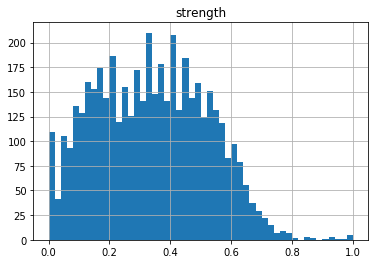

In [14]:
d.hist(bins = 50)

In [15]:
aboveMa('se',20, '2020-01-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.7929515418502202

In [16]:
aboveMa('se',20, '2020-10-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.868421052631579

In [17]:
aboveMa('ttd',20, '2020-01-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.7444933920704846

In [18]:
aboveMa('ttd',20, '2020-10-01', '2020-12-23')

[*********************100%***********************]  1 of 1 completed


0.9210526315789473

In [29]:
print(d.sort_values(by = ['strength'], ascending = False)[:100].to_string())

       strength
stock          
PDAC   1.000000
INAQ   1.000000
PAIC   1.000000
TLS    1.000000
CERE   1.000000
PRAX   0.960000
U      0.955556
SVAL   0.937500
ALGM   0.937500
TVTX   0.920000
STTK   0.900000
PRLD   0.875000
FSTX   0.863636
ONCR   0.857143
FHTX   0.850000
EBC    0.846154
TWCT   0.800000
ATHA   0.800000
KYMR   0.796875
RADI   0.794118
SE     0.791111
SNOW   0.787234
CRSR   0.785714
LEAP   0.785714
TMTS   0.785714
SQ     0.777778
LUNG   0.777778
NGA    0.774194
XJR    0.769231
NVDA   0.764444
MRTX   0.764444
ALGS   0.760000
CLCT   0.760000
EAR    0.760000
IIVIP  0.756757
TWST   0.755556
CRWD   0.751111
AVGO   0.751111
CVNA   0.746667
TTD    0.742222
KNSL   0.742222
NOW    0.737778
ZG     0.737778
IDXX   0.737778
BLK    0.737778
ZM     0.737778
RH     0.733333
LOGI   0.733333
SAM    0.728889
BL     0.728889
SITM   0.724444
RARE   0.724444
Z      0.724444
AVGOP  0.724444
DOCU   0.724444
TSLA   0.720000
TMO    0.715556
CDNS   0.715556
POOL   0.715556
NVMZ   0.714286
SVAC   0

In [31]:
d.to_pickle('momentum')

In [32]:
pd.read_pickle('momentum')

,strength
stock,
A,0.657778
AACQ,0.092593
AACQU,0.010870
AACQW,NaN
AAIC,0.133333
...,...
ZTS,0.608889
ZUMZ,0.453333
ZVO,0.231111
